In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
df=pd.read_csv(r"C:\Users\92331\Desktop\ML\datasets\student-scores.csv")
df.describe()


,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [9]:
# Add all course grades into one total_score column
df["total_score"] = (
    df["math_score"] +
    df["history_score"] +
    df["physics_score"] +
    df["chemistry_score"] +
    df["biology_score"] +
    df["english_score"] +
    df["geography_score"]
)

<Axes: xlabel='weekly_self_study_hours', ylabel='total_score'>

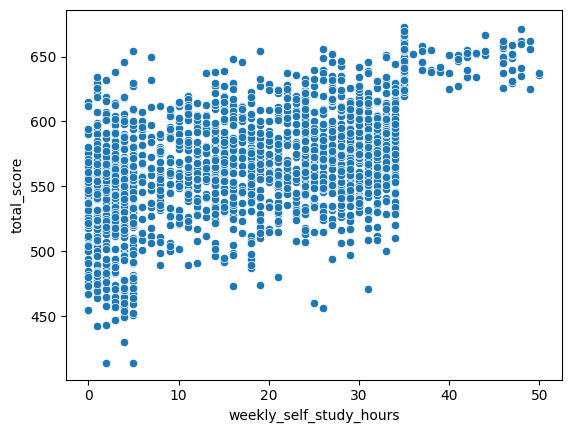

In [13]:
sns.scatterplot(data=df,x='weekly_self_study_hours',y='total_score')

In [20]:
x=df[["weekly_self_study_hours"]]
y=df["total_score"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

print("w(coefficient ):",model.coef_[0])
print("b(y-intercept):",model.intercept_)

w(coefficient ): 1.699539714983112
b(y-intercept): 535.8981014439644


In [23]:
y_pred=model.predict(x_test)
comparison=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
print(comparison.head())

      Actual   predicted
1860     633  568.189356
353      559  537.597641
1333     537  563.090737
905      522  544.395800
1289     538  539.297181


Text(0.5, 0, 'Hours Studied')

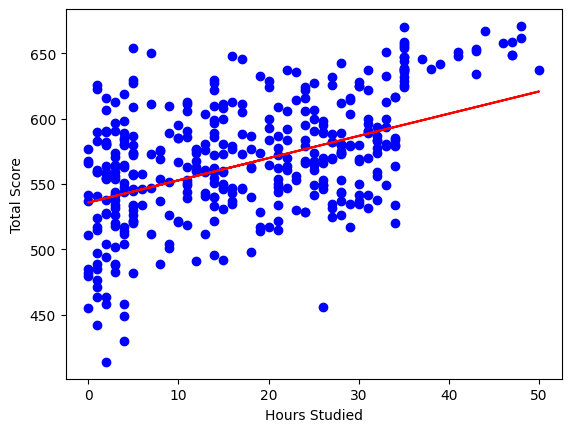

In [ ]:
plt.scatter(x_test,y_test,color="blue",label="actual")
plt.plot(x_test,y_pred,color="red",label="predicted" )
plt.ylabel("Total Score")
plt.xlabel("Hours Studied")


In [25]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Squared Error: 1553.6039613803282
Root Mean Squared Error: 39.41578315066603
R² Score: 0.2617535317132843


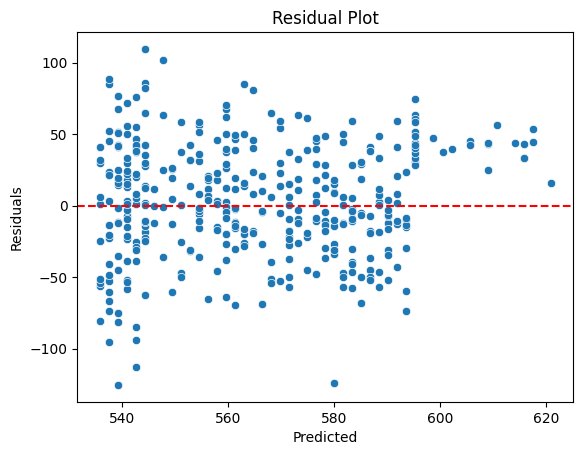

In [27]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
